In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_train = pd.read_csv('dataset/train.csv', index_col='Unnamed: 0')
data_train.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]


# Opis datasetu

Tento dataset obsahuje prieskum spokojnosti pasažierov leteckých liniek.

## Opis stĺpcov

Gender: Pohlavie pasažiera (Female, Male)

Customer Type: Typ zákazníka (Loyal customer, disloyal customer)

Age: Vek pasažiera

Type of Travel: Dôvod cesty (Personal Travel, Business Travel)

Class: Trieda  (Business, Eco, Eco Plus)

Flight distance: Dĺžka letu

Inflight wifi service: Spokojnosť s dostupnosťou wi-fi siete (0-5)

Departure/Arrival time convenient: Spokojnosť s časom odletu/príletu (0-5)

Ease of Online booking: Spokojnosť s jednoduchosťou online bookingu letu (0-5)

Gate location: Spokojnosť s umiestnením nástupnej brány (0-5)

Food and drink: Spokojnosť s jedlom a pitím (0-5)

Online boarding: Spokojnosť s online boardingom (0-5)

Seat comfort: Spokojnosť s pohodlnosťou sedadla (0-5)

Inflight entertainment: Spokojnosť so zábavou počas letu (0-5)

On-board service: Spokojnosť so servisom na palube lietadla (0-5)

Leg room service: Spokojnosť s miestom na nohy (0-5)

Baggage handling: Spokojnosť s manipuláciou s batožinou (0-5)

Check-in service: Spokojnosť s check-inom (0-5)

Inflight service: Spokojnosť so servisom počas letu (0-5)

Cleanliness: Spokojnosť s čistotou (0-5)

Departure Delay in Minutes: Meškanie odletu v minútach

Arrival Delay in Minutes: Meškanie príletu v minútach

Satisfaction: Spokojnosť zákazníka(Satisfaction, neutral or dissatisfaction)

# Identifikacia problemov

## Identifikacia NAN
V datasete sa chybajuce hodnoty nachadzaju iba v stlpci "Arrival Delay in Minutes". Konkretne tam chyba 310 hodnot.

In [3]:
data_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

## Kategorické stĺpce
V datasete sa nachádza 5 kategorických stĺpcov. Konkrétne ide o "Gender", "Customer Type", "Type of Travel", "Class" a "satisfaction". Tak isto všetky stĺpce, ktoré zachytávajú spokojnosť pasažiera na stupnici od 0 do 5 môžeme považovať za kategorické reprezentované číselnými hodnotami.

In [4]:
for col in data_train.columns:
    if data_train[col].dtypes == 'object':
        print(f"{col}: {data_train[col].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
satisfaction: ['neutral or dissatisfied' 'satisfied']


### Opis

In [5]:
data_train.describe(exclude=np.number)

Gender   Customer Type   Type of Travel     Class  \
count   103904          103904           103904    103904   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     52727           84923            71655     49665   

                   satisfaction  
count                    103904  
unique                        2  
top     neutral or dissatisfied  
freq                      58879

### Gender
Stĺpec "Gender" pozostáva z dvoch unikátnych hodnôt "Female" a "Male". Z grafu je vidno, že dáta v tomto stĺpci sú vyvážené. Počet "Female" záznamov je 52 727 a "Male" je 51 177. 

Number of females: 52727
Number of males: 51177


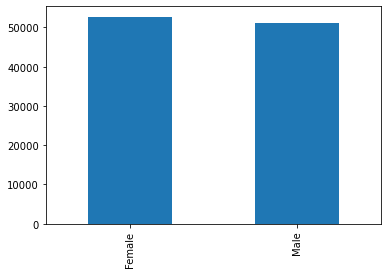

In [6]:
n_female = len(data_train[data_train["Gender"] == 'Female'])
n_male = len(data_train[data_train["Gender"] == 'Male'])

print(f"Number of females: {n_female}")
print(f"Number of males: {n_male}")

data_train["Gender"].value_counts().plot(kind='bar')

### Customer Type
Stĺpec "Customer Type" pozostáva z dvoch uniukátnych hodnôt "Loyal Customer" a "disloyal Customer". Z grafu je vidno, že dátav tomto stĺpci sú výrazne nevyvážené. Prevažuje "Loyal Customer" s počtom výskytov 84 923. Pričom "Loyal Customer" má len 18 981.

Number of loyal customer: 84923
Number of disloyal customers: 18981


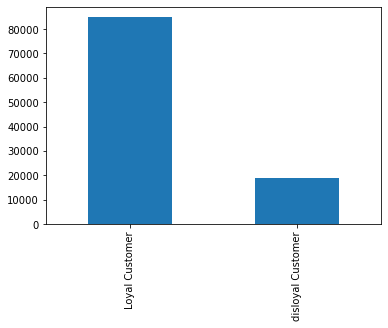

In [7]:
n_loyal = len(data_train[data_train["Customer Type"] == 'Loyal Customer'])
n_disloyal = len(data_train[data_train["Customer Type"] == 'disloyal Customer'])

print(f"Number of loyal customer: {n_loyal}")
print(f"Number of disloyal customers: {n_disloyal}")

data_train["Customer Type"].value_counts().plot(kind='bar')

### Type of Travel
Stĺpec "Type of Travel" pozostáva z dvoch unikátnych hodnôt "Business travel" a "Personal Travel". Počet riadko s hodnotou "Business travel" je 71 655 a s hodnotou "Personal Travel" je 32 249. Ako môžeme vidieť na grafe nižšie, dáta v tomto stĺpci sú nevyvážené. Avšak nie až tak výrazne ako v prípade stĺpca "Customer type".

Number of business travels: 71655
Number of personal travel: 32249


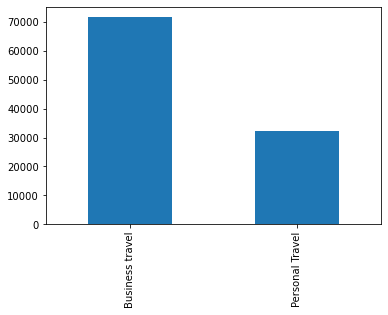

In [8]:
n_business = len(data_train[data_train["Type of Travel"] == 'Business travel'])
n_personal = len(data_train[data_train["Type of Travel"] == 'Personal Travel'])

print(f"Number of business travels: {n_business}")
print(f"Number of personal travel: {n_personal}")

data_train["Type of Travel"].value_counts().plot(kind='bar')

### Class
Stĺpec "Class" pozostáva z troch unikátnych hodnôt "Business", "Eco" a "Eco Plus". Počet riadkov s hodnotou "Business" je 49 665, "Eco" je 46 745 a "Eco Plus" je 7 494. Na grafe nižšie môžeme vidieť že počet riadkov s hodnotami "Business" a "Eco" je celkom vyrovnaný. Avšak počet riadkov s hodnotou "Eco Plus" je oveľa menší. 

Number of business class: 49665
Number of eco class: 46745
Number of eco plus class: 7494


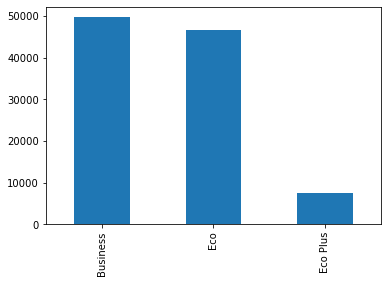

In [9]:
n_business = len(data_train[data_train["Class"] == 'Business'])
n_eco = len(data_train[data_train["Class"] == 'Eco'])
n_eco_plus = len(data_train[data_train["Class"] == 'Eco Plus'])

print(f"Number of business class: {n_business}")
print(f"Number of eco class: {n_eco}")
print(f"Number of eco plus class: {n_eco_plus}")

data_train["Class"].value_counts().plot(kind='bar')

### satisfaction
Stĺpec "satisfaction" pozostáva z dvoch unikátnyc hodnôt "neutral or dissatisfied" and "satisfied". Počet riadkov s hodnotou "neutral or dissatisfied" je 58 879 a s hodnotou "satisfied" je 45 025. Jedná sa o target values, ktoré budeme predikovať.

Number of neutral or dissatisfied: 58879
Number of satisfied: 45025


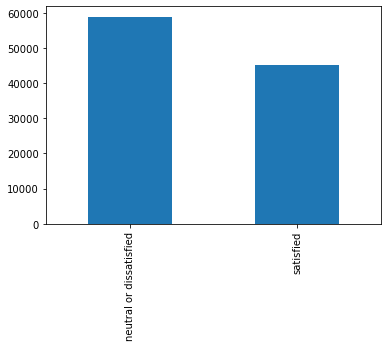

In [10]:
n_dissatisfied = len(data_train[data_train["satisfaction"] == 'neutral or dissatisfied'])
n_satisfied = len(data_train[data_train["satisfaction"] == 'satisfied'])

print(f"Number of neutral or dissatisfied: {n_dissatisfied}")
print(f"Number of satisfied: {n_satisfied}")

data_train["satisfaction"].value_counts().plot(kind='bar')

## Ordinálne stĺpce
V nasledujúcej časti sa nachádzajú stĺpcové grafy znázorňujúce početnosť jednotlivých hodnotení danej otázky. Oborom hodnôt je {0, 1, 2, 3, 4, 5}. 5 znamená, že pasažier bol maximálne spokojný. 1 znamená najmenšiu možnú spokojnoť. 0 znamená, že sa pasažier nevyjadril. Vo všetkých prípadoch môžeme pozorovať, že hodnotenie 0 a 1 sa nachádzalo na posledných miestach až na jednu výnimku. Grafy majú normálne rozdelenie, pričom niektoré sú posunuté do prava. Najvyšší priemer dosiahli pri "Inflight service" (3.64).

In [11]:
cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort']

data_train[cols].describe()

Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  
count  103904.000000  
mean        3.439396  
std         1.319088  
min         0.000000  
25%         2.000000  
50%         4.000000  
75%         5.000000  
max         5.000000

In [12]:
cols = ['Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

data_train[cols].describe()

Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  
count     103904.000000    103904.000000     103904.000000  103904.000000  
mean           3.631833         3.304290          3.640428       3.286351  
std            1.180903         1.265396          1.175663       1.312273  
min            1.000000         0.000000          0.000000       0.000000  
25%            3.000000         3.000000          3.000000       2.000000  
50%            4.000000         3.000000          4.000000       3.000000  
75%            5.000000         4.000000          5.000000       4.000000  
max            5.000000         5.000000          5.000000       5.000000

### Inflight wifi service

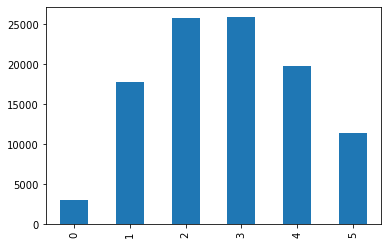

In [13]:
data_train["Inflight wifi service"].value_counts().sort_index().plot(kind='bar')

### Departure/Arrival time convenient

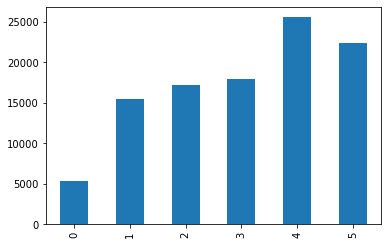

In [14]:
data_train["Departure/Arrival time convenient"].value_counts().sort_index().plot(kind='bar')

### Ease of Online booking

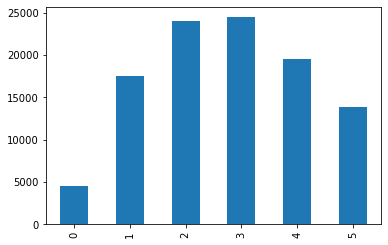

In [15]:
data_train["Ease of Online booking"].value_counts().sort_index().plot(kind='bar')

### Gate location

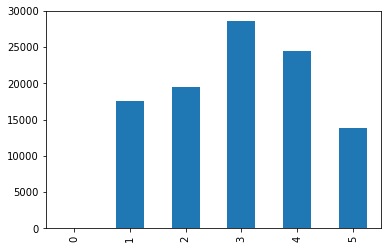

In [16]:
data_train["Gate location"].value_counts().sort_index().plot(kind='bar')

### Food and drink

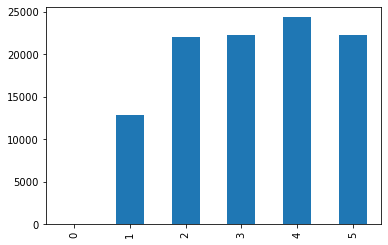

In [17]:
data_train["Food and drink"].value_counts().sort_index().plot(kind='bar')

### Online boarding

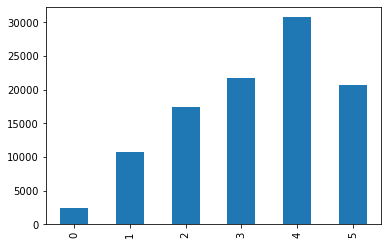

In [18]:
data_train["Online boarding"].value_counts().sort_index().plot(kind='bar')

### Seat comfort

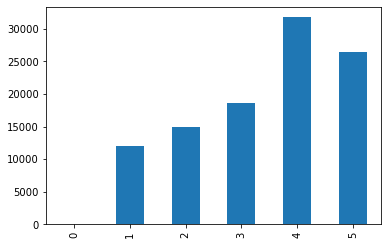

In [19]:
data_train["Seat comfort"].value_counts().sort_index().plot(kind='bar')

### Inflight entertainment

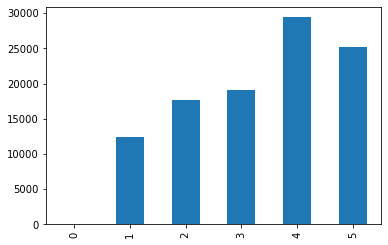

In [20]:
data_train["Inflight entertainment"].value_counts().sort_index().plot(kind='bar')

### On-board service

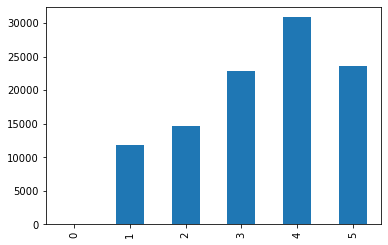

In [21]:
data_train["On-board service"].value_counts().sort_index().plot(kind='bar')

### Leg room service

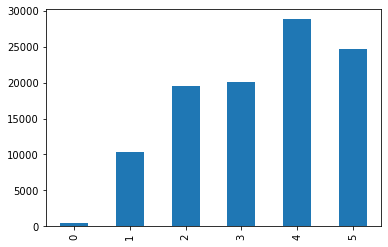

In [22]:
data_train["Leg room service"].value_counts().sort_index().plot(kind='bar')

### Baggage handling

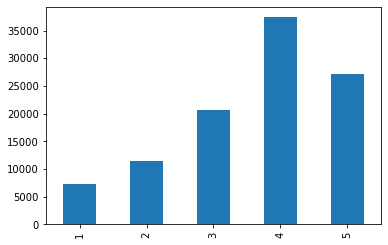

In [23]:
data_train["Baggage handling"].value_counts().sort_index().plot(kind='bar')

### Checkin service

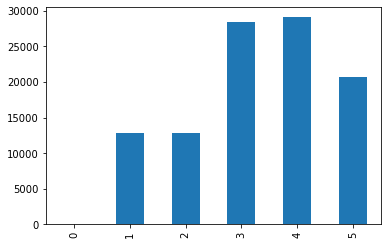

In [24]:
data_train["Checkin service"].value_counts().sort_index().plot(kind='bar')

### Inflight service

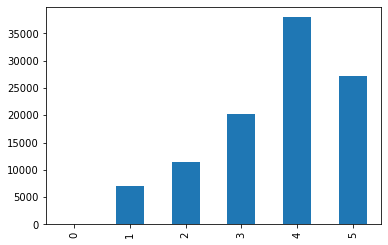

In [25]:
data_train["Inflight service"].value_counts().sort_index().plot(kind='bar')

### Cleanliness

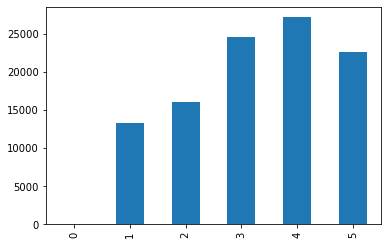

In [26]:
data_train["Cleanliness"].value_counts().sort_index().plot(kind='bar')

## Spojite stĺpce

In [27]:
cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

data_train[cols].describe()

Age  Flight Distance  Departure Delay in Minutes  \
count  103904.000000    103904.000000               103904.000000   
mean       39.379706      1189.448375                   14.815618   
std        15.114964       997.147281                   38.230901   
min         7.000000        31.000000                    0.000000   
25%        27.000000       414.000000                    0.000000   
50%        40.000000       843.000000                    0.000000   
75%        51.000000      1743.000000                   12.000000   
max        85.000000      4983.000000                 1592.000000   

       Arrival Delay in Minutes  
count             103594.000000  
mean                  15.178678  
std                   38.698682  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                 1584.000000

### "Age"

Tento stĺpec reprezentuje vek pasažiera. Na boxplote sme sa snažili identifikovať možných outlierov. Z druhého grafu je možné vyčítať, že dáta majú rozdelenie podobné normálnemu rozdeleniu. Tak isto vidíme, že medián veku pasažiera je 40 rokov.

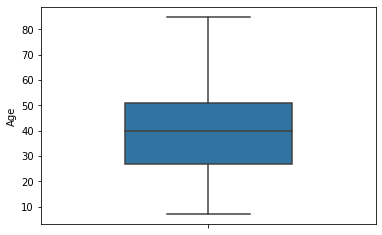

In [28]:
sns.boxplot(y=data_train['Age'], width=0.5)

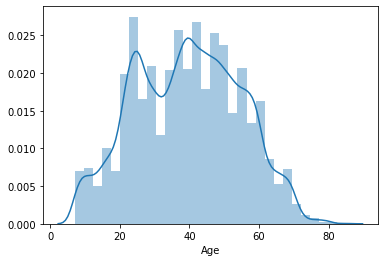

In [29]:
sns.distplot(data_train["Age"], bins=30)

### "Flight Distance"

Na boxplote sme identifikovali možných outlierov. Na druhom grafe vidíme, že dáta sú naklonené do ľava. Má logické rozdelenie, pretože má dáta sústredené na ľavom chvoste.

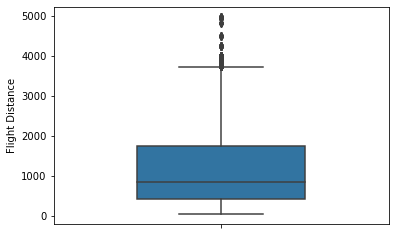

In [30]:
sns.boxplot(y=data_train['Flight Distance'], width=0.5)

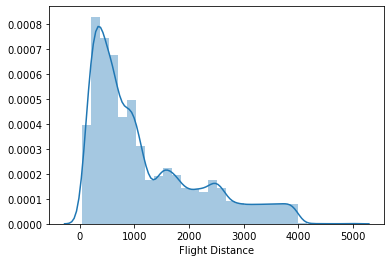

In [31]:
sns.distplot(data_train["Flight Distance"], bins=30)

### "Departure Delay in Minutes"
Na grafoch môžeme vidieť, že dáta sú sústredené pri hodnote 0. Keďže väčšina dát sa nachádza v okolí nuly, boxplot označil všetky dáta výraznejšie odchýlené od nuly za outlierov.

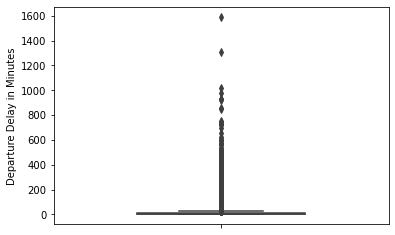

In [32]:
sns.boxplot(y=data_train['Departure Delay in Minutes'], width=0.5)

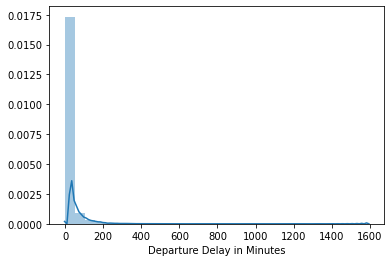

In [33]:
sns.distplot(data_train["Departure Delay in Minutes"], bins=30)

### "Arrival Delay in Minutes"

Na druhom grafe vidíme, že dáta sú sústredené pri nule. Keďže väčšina dát sa nachádza v okolí nuly, boxplot označil všetky dáta výraznejšie odchýlené od nuly za outlierov.

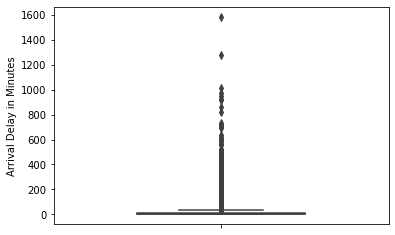

In [34]:
sns.boxplot(y=data_train['Arrival Delay in Minutes'], width=0.5)

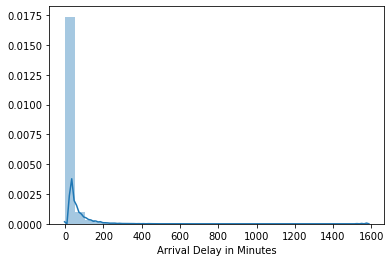

In [35]:
sns.distplot(data_train["Arrival Delay in Minutes"], bins=30)